# Solow model with Human Capital

Imports and set magics:

In [51]:
import numpy as np
from scipy import optimize
import sympy as sm
import ipywidgets as widgets
from IPython.display import display

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2
%matplotlib inline

# local modules
import modelproject
from modelproject import SolowModelHumanCapital

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Analysis of the Solow Model with Human Capital

The Solow model is a foundational economic model that elucidates long-term economic growth dynamics. This version of the classical Solow model is with human capital incorporated and with an extension where savings in human capital increases from production.

## Purpose

The Solow model with human capital integration aims to dissect the multifaceted relationship between capital accumulation, labor force growth, and advancements in technology. By including human capital, we extend the model's capacity to simulate more realistic scenarios where education and skill development play crucial roles.

## Model Equations

The extended Solow model is described by the following equations, incorporating both physical and human capital:

$$
Y_t = K_t^\alpha H_t^\phi (A_t L_t)^{1-\alpha-\phi}, \quad 0 < \alpha, \phi < 1
$$

where:
- $Y_t$ is the total output at time \(t\),
- $K_t$ represents physical capital,
- $H_t$ denotes human capital,
- $A_t$ is the level of technology,
- $L_t$ is the labor force,
- $\alpha$ and $\phi$ are the output elasticities of physical and human capital, respectively.

### Growth Dynamics

Labor and technology evolve as follows:
$$
L_{t+1} = (1 + n) L_t, \quad L_0 \text{ given}
$$
$$
A_{t+1} = (1 + g) A_t, \quad A_0 \text{ given}
$$

### Capital Accumulations

The accumulation equations for physical and human capital are:
$$
K_{t+1} = s_K Y_t + (1 - \delta) K_t, \quad K_0 \text{ given}
$$
$$
H_{t+1} = s_H Y_t + (1 - \delta) H_t, \quad H_0 \text{ given}
$$

### Extended version
In our extended version we have that 
$$sH_t = sH_{t-1} + 0,00015 * \tilde{y}_{t-1}$$


With this extiension we have introduced a dynamic component where the savings rate allocated to human capital $sH_t$ increases over time (0,15%) as a function of the previous period's output per effective worker $\tilde{y}_{t-1}$.

This extension represents that as the economy grows and becomes more productive, a portion of the produced output is reinvested into human capital development. The idea behind this is that higher output leads to greater availability of resources, some of which can be allocated towards improving the skills and education of the workforce. 

### Transition Equations Using Tilde Variables

Utilizing tilde variables, which represent per effective worker values $\tilde{k} = \frac{K_t}{A_t L_t}$, we transform the accumulation equations:

$$
\tilde{k}_{t+1} = \frac{s_K \tilde{y}_t + (1 - \delta) \tilde{k}_t}{(1 + n)(1 + g)}
$$
$$
\tilde{h}_{t+1} = \frac{s_H \tilde{y}_t + (1 - \delta) \tilde{h}_t}{(1 + n)(1 + g)}
$$

These tilde variables help analyze the model's behavior in a normalized manner, facilitating the understanding of growth trajectories and steady state conditions.

## Steady State Analysis

We derive the steady state values by setting the change in tilde variables across periods to zero, leading to a system of equations:
$$
0 = \frac{s_K \tilde{k}_t^\alpha \tilde{h}_t^\phi - (n + g + \delta + ng) \tilde{k}_t}{(1 + n)(1 + g)}
$$
$$
0 = \frac{s_H \tilde{k}_t^\alpha \tilde{h}_t^\phi - (n + g + \delta + ng) \tilde{h}_t}{(1 + n)(1 + g)}
$$

Solving these equations provides insights into the model's long-term equilibrium states under different parameter settings and growth mechanisms.

## Model Simulation and Results

In this project we initialize the model with specified parameters, simulate its progression, and visualize the trajectories of $\tilde{k}_t$ and $\tilde{h}_t$ towards their steady states.




## Numerical solution

To solve our model for Steady state values, we use two different methods. First, we simulate the evolution of the model over time, and then loop until we find the steady state results. The result of this method is shown below.

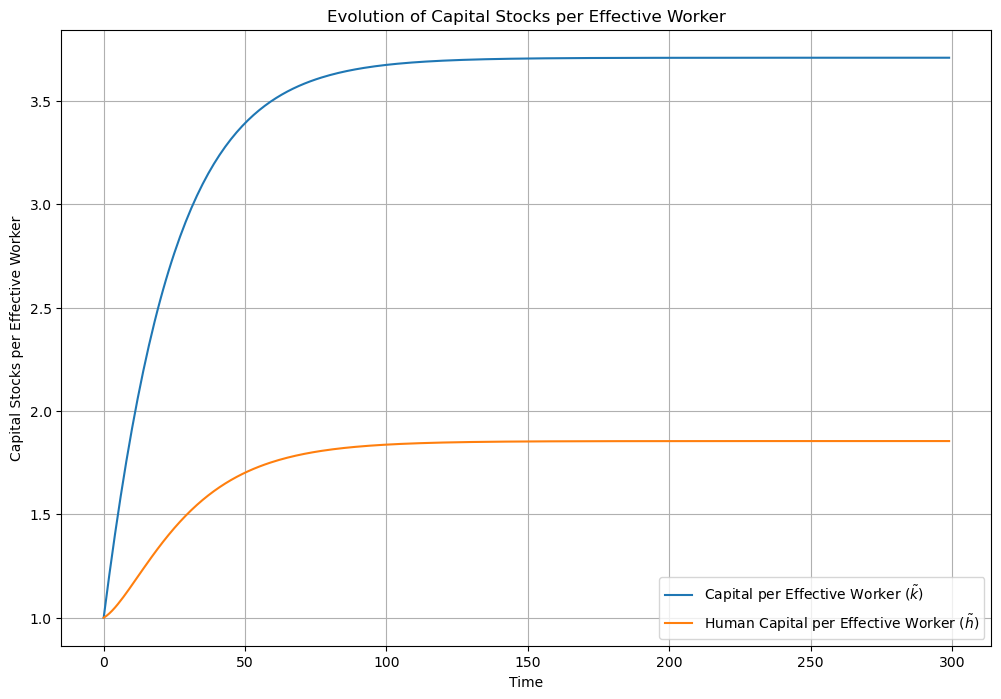

Steady State:
k_tilde: 3.7095, h_tilde: 1.8547 


In [52]:

# Initialize and simulate the base model
base_model = SolowModelHumanCapital()
base_model.plot_tilde_variables()

# Print the steady state values for the base model
print("Steady State:")
print(f"k_tilde: {base_model.K_tilde[-1]:.4f}, h_tilde: {base_model.H_tilde[-1]:.4f} ")



Hereafter, we use another numerical solution, where we use scipy's fsolve function, to calculate the steady state in our model. 
We use fsolve because we have a system of 2 nonlinear equations, and our goal is to find the roots, which are the values of variables which makes the equation 0. fsolve does this simultaniously for both $\tilde{k}$ and $\tilde{h}$.

In the code we have defined the equations as follows:
$$
0 = s_K \tilde{k}_t^\alpha \tilde{h}_t^\phi - (n + g + \delta + ng) 
$$
$$
0 = s_H \tilde{k}_t^\alpha \tilde{h}_t^\phi - (n + g + \delta + ng)
$$



As seen below, the results are almost identical.

In [53]:
# Initialize and solve model using fsolve
base_model = SolowModelHumanCapital()

k_tilde_ss, h_tilde_ss = base_model.steady_state()
y_tilde_ss = k_tilde_ss**base_model.params['alpha'] * h_tilde_ss**base_model.params['phi']
# Print the steady state values for the base model
print("Steady State:")
print(f"k_tilde: {k_tilde_ss}, h_tilde: {h_tilde_ss} and therefore y_tilde: {y_tilde_ss}")

Steady State:
k_tilde: 3.709463756241649, h_tilde: 1.8547318781208244 and therefore y_tilde: 1.676677617821231


# Further analysis

To visualise how the different parameters impact our model, we have created a plot with interactive widgets, that shows how k_tilde and h_tilde is impacted by each parameter. 

In [54]:
# Initialize the model
model = SolowModelHumanCapital()

# Define a function to update the plot based on the slider
def update_model(alpha, phi, g, n, s_K, s_H, delta):
    model.update_params(alpha=alpha, phi=phi, g=g, n=n, s_K=s_K, s_H=s_H, delta=delta)
    model.plot_tilde_variables()

# Create sliders for parameters
alpha_slider = widgets.FloatSlider(value=0.3, min=0.1, max=0.9, step=0.05, description='Alpha')
phi_slider = widgets.FloatSlider(value=0.2, min=0.1, max=0.9, step=0.05, description='Phi')
g_slider = widgets.FloatSlider(value=0.02, min=0, max=0.1, step=0.01, description='g')
n_slider = widgets.FloatSlider(value=0.02, min=0, max=0.1, step=0.01, description='n')
s_K_slider = widgets.FloatSlider(value=0.2, min=0.1, max=0.5, step=0.05, description='s_K')
s_H_slider = widgets.FloatSlider(value=0.1, min=0.05, max=0.5, step=0.05, description='s_H')
delta_slider = widgets.FloatSlider(value=0.05, min=0, max=0.1, step=0.01, description='Delta')

# Display sliders and bind the update function
ui = widgets.VBox([alpha_slider, phi_slider, g_slider, n_slider, s_K_slider, s_H_slider, delta_slider])
out = widgets.interactive_output(update_model, {'alpha': alpha_slider, 'phi': phi_slider, 'g': g_slider, 'n': n_slider, 's_K': s_K_slider, 's_H': s_H_slider, 'delta': delta_slider})
display(ui, out)

Output()

We will look at an example with our figure above: Intially we start with the following parameters: $\alpha=0.3, \phi=0.2, g=0.02, n=0.02, s_K=0.2, s_H=0.1, \delta=0.05$.
If the population growth were to increase from 2% to 4% ($n=0.04$), ceteris paribus both the  steady-state capital per effective worker and human capital per effective worker decrease.

The higher the population growth is, the harder it is to maintain the same level capital and human capital per effective worker. This is due to the fact that the economy needs more resources to the capital stock, which will result in fewer resources left for new investments. All in all, this will lead to a decreased capacity for growth and development in the models per capita terms. 

## Extension

As an extention to the Solow model, we have made a version, where the savings in human capital will increase by 0,00015 * $\tilde{y}_{t-1}$ every year until it reaches an upper bound of 0.4. This bound is made to make sure the sum of savings in capital and human capital will not go over a realistic amount, which we decide to be 60% of output. This will change the steady state value of both k_tilde and h_tilde. Since the savings in human capital increases each year, the time T where steady state is reached will change each year t, until the upper bound is reached. Therefore we plot the sollow model up to T = 1500 so the new steady state is visible.

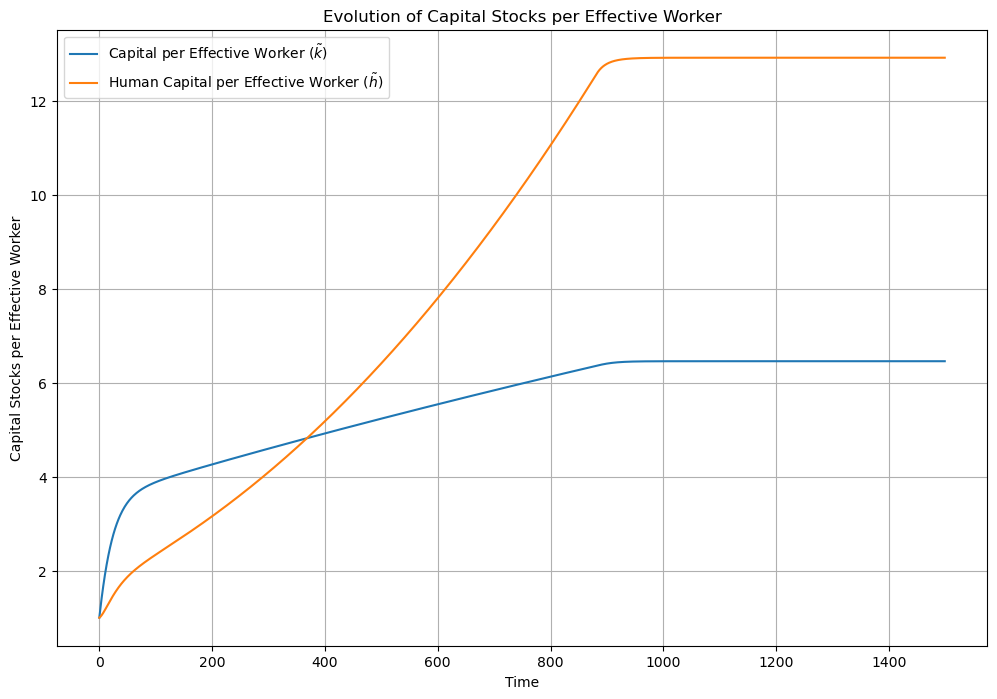

Extension Model Steady State (Increased savings in human capital):
k_tilde: 6.4586, h_tilde: 12.9171


In [55]:
# Initialize and simulate the extension model with endogenous growth
extension_model = SolowModelHumanCapital(Increase_saving=True , T=1500)
extension_model.plot_tilde_variables()

# Print the steady state values for the extension model
print("Extension Model Steady State (Increased savings in human capital):")
print(f"k_tilde: {extension_model.K_tilde[-1]:.4f}, h_tilde: {extension_model.H_tilde[-1]:.4f}")


As seen, the steady state value of $\tilde{k}$ and $\tilde{h}$ is much higher, and there is especially a big change in $\tilde{h}$, which increases from 1,85 to 12.9171. This big change in steady state values is caused by the fact that $\tilde{y}$ increases way more than in the initial model, because the steady state gets pushed further away each year. Therefore the value of physical capital and human capital will also increase accordingly. The difference between our extension result and a version of our initial model with $\tilde{h} = 0.4$ (Which can be attempted in the interactive plot earlier) is that the initial model would have the higher savings from t=1, and therefore the T where steady state is reached can be found instantly, while in the extension, the time T will change each year.

# Conclusion

By the solution of the base model and the extension we can see that, when theres increased savings in human capital, the SS values of effective worker variables (tilde variables) increases. This has a stronger effect on h_tilde, but it also impacts k_tilde.  